# EDA

### imports

In [ ]:
!pip install py7zr

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import py7zr
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kkbox-music-recommendation-challenge/test.csv.7z
/kaggle/input/kkbox-music-recommendation-challenge/train.csv.7z
/kaggle/input/kkbox-music-recommendation-challenge/songs.csv.7z
/kaggle/input/kkbox-music-recommendation-challenge/members.csv.7z
/kaggle/input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z
/kaggle/input/kkbox-music-recommendation-challenge/sample_submission.csv.7z


### read files

In [5]:
# Paths to the .7z files
file_paths = [
    "/kaggle/input/kkbox-music-recommendation-challenge/test.csv.7z",
    "/kaggle/input/kkbox-music-recommendation-challenge/train.csv.7z",
    "/kaggle/input/kkbox-music-recommendation-challenge/songs.csv.7z",
    "/kaggle/input/kkbox-music-recommendation-challenge/members.csv.7z",
    "/kaggle/input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z",
    "/kaggle/input/kkbox-music-recommendation-challenge/sample_submission.csv.7z"
]

# Directory to extract CSV files
extracted_dir = "/kaggle/working/extracted_csv/"

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Extract each .7z file
for file_path in file_paths:
    with py7zr.SevenZipFile(file_path, mode='r') as z:
        z.extractall(path=extracted_dir)

print("Extraction complete.")

# List the extracted CSV files
extracted_files = os.listdir(extracted_dir)
csv_files = [file for file in extracted_files if file.endswith('.csv')]

print("Extracted CSV files:")
print(csv_files)

Extraction complete.
Extracted CSV files:
['song_extra_info.csv', 'test.csv', 'train.csv', 'songs.csv', 'members.csv', 'sample_submission.csv']


In [6]:
test = pd.read_csv('/kaggle/working/extracted_csv/test.csv')
train = pd.read_csv('/kaggle/working/extracted_csv/train.csv')
songs = pd.read_csv('/kaggle/working/extracted_csv/songs.csv')
members = pd.read_csv('/kaggle/working/extracted_csv/members.csv')
song_extra_info = pd.read_csv('/kaggle/working/extracted_csv/song_extra_info.csv')
sample_submission = pd.read_csv('/kaggle/working/extracted_csv/sample_submission.csv')

### unique values in train and test

In [7]:
def analyze_column_on_uniq_values(train_df, test_df, column_name):
    # Уникальные значения в тренировочном и тестовом наборах данных
    unique_train_values = set(train_df[column_name].unique())
    unique_test_values = set(test_df[column_name].unique())

    # Найти пересечение уникальных значений
    intersection = unique_train_values.intersection(unique_test_values)

    # Количество новых значений в тестовом наборе данных
    new_in_test = unique_test_values - unique_train_values
    print(f"\033[1m{column_name}\033[0m stats: ")
    print(f"Количество уникальных в трейне:", len(unique_train_values))
    print(f"Количество уникальных в тесте:", len(unique_test_values))
    print(f"Количество пересекающихся:", len(intersection))
    print(f"Количество новых в тесте:", len(new_in_test))
    print(f"Процент новых в тестовом наборе данных:", len(new_in_test) / len(unique_test_values) * 100)

In [8]:
analyze_column_on_uniq_values(train, test, 'song_id')

song_id stats: 
Количество уникальных в трейне: 359966
Количество уникальных в тесте: 224753
Количество пересекающихся: 164880
Количество новых в тесте: 59873
Процент новых в тестовом наборе данных: 26.639466436488057


Всего в трейне 359966 уникальных song_id, в тесте 224753 уникальных song_id.

Общих уникальных song_id 164880. 

При это стоит отметить, что 59873 song_id есть в тесте, но нет в трейне. А это около 26,6% от общего количества тесте.

In [9]:
analyze_column_on_uniq_values(train, test, 'msno')

msno stats: 
Количество уникальных в трейне: 30755
Количество уникальных в тесте: 25131
Количество пересекающихся: 21483
Количество новых в тесте: 3648
Процент новых в тестовом наборе данных: 14.515936492777845


Всего в трейне 30755 уникальных msno, в тесте 25131 уникальных msno.

Общих уникальных msno 21483. 

При это стоит отметить, что 3648 msno есть в тесте, но нет в трейне. А это около 14,5% от общего количества тесте.

In [10]:
train_merged = train.merge(songs[['song_id', 'artist_name', 'genre_ids', 'language']], on='song_id')
test_merged = test.merge(songs[['song_id', 'artist_name', 'genre_ids', 'language']], on='song_id')

In [11]:
analyze_column_on_uniq_values(train_merged, test_merged, 'artist_name')

artist_name stats: 
Количество уникальных в трейне: 40582
Количество уникальных в тесте: 27563
Количество пересекающихся: 21773
Количество новых в тесте: 5790
Процент новых в тестовом наборе данных: 21.006421652214925


In [12]:
analyze_column_on_uniq_values(train_merged, test_merged, 'language')

language stats: 
Количество уникальных в трейне: 11
Количество уникальных в тесте: 11
Количество пересекающихся: 10
Количество новых в тесте: 1
Процент новых в тестовом наборе данных: 9.090909090909092


In [13]:
analyze_column_on_uniq_values(train_merged, test_merged, 'genre_ids')

genre_ids stats: 
Количество уникальных в трейне: 573
Количество уникальных в тесте: 502
Количество пересекающихся: 466
Количество новых в тесте: 36
Процент новых в тестовом наборе данных: 7.171314741035857


In [14]:
listen_log = train[['msno', 'song_id', 'target']].merge(songs, on='song_id')

listen_log_groupby = listen_log.groupby('song_id').agg(
    chance=('target', 'mean'),
    plays=('target', 'count')
).reset_index()

song_data = listen_log_groupby.merge(songs, on='song_id')

song_data['repeat_events'] = song_data['chance'] * song_data['plays']

In [15]:
x_values = []  # список для значений числа проигрываний
y_values = []  # список для средней вероятности повторных проигрываний

for i in range(1, song_data['plays'].max() + 1):
    plays_i = song_data[song_data['plays'] == i]  # фильтрация данных для текущего числа проигрываний
    if not plays_i.empty:
        x_values.append(i)
        y_values.append(plays_i['repeat_events'].sum() / plays_i['plays'].sum())  # Вычисление средней вероятности повторных проигрываний и добавление в список y_values

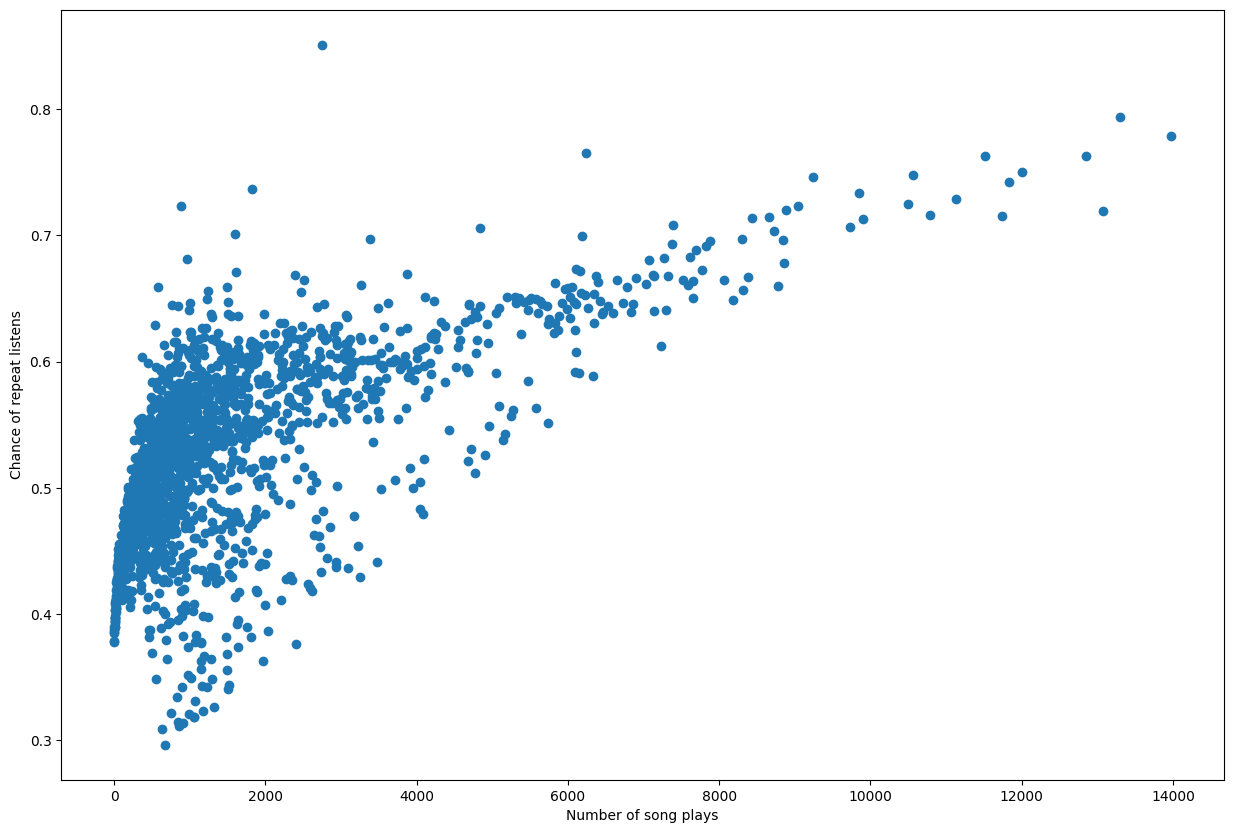

In [16]:
f,axarray = plt.subplots(1,1,figsize=(15,10))
plt.xlabel('Number of song plays')
plt.ylabel('Chance of repeat listens')
_ = plt.scatter(x_values, y_values)

In [17]:
def count_vals(x):
    if type(x) != str:
        return 1
    else:
        return 1 + x.count('|')

In [18]:
# count number of genres, composers, lyricsts
song_data['number_of_genres'] = song_data['genre_ids'].apply(count_vals)
song_data['number_of_composers'] = song_data['composer'].apply(count_vals)
song_data['number_of_lyricists'] = song_data['lyricist'].apply(count_vals)

In [19]:
song_data['number_of_genres'].describe()

count    359914.000000
mean          1.086712
std           0.364739
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: number_of_genres, dtype: float64

In [20]:
song_data['number_of_composers'].describe()

count    359914.000000
mean          1.407400
std           1.121836
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          51.000000
Name: number_of_composers, dtype: float64

In [21]:
song_data['number_of_lyricists'].describe()

count    359914.000000
mean          1.119479
std           0.625642
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          23.000000
Name: number_of_lyricists, dtype: float64

In [22]:
max_comp_song = song_data.iloc[song_data['number_of_composers'].idxmax()]
max_lyr_song = song_data.iloc[song_data['number_of_lyricists'].idxmax()]
pd.set_option('display.max_colwidth', None)
print(max_comp_song[['artist_name', 'composer', 'lyricist', 'number_of_composers', 'number_of_lyricists']], '\n')
print(max_lyr_song[['artist_name', 'composer', 'lyricist', 'number_of_composers', 'number_of_lyricists']])

artist_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [25]:
n_genres_max = song_data['number_of_genres'].max()
n_composers_max = song_data['number_of_composers'].max()
n_lyricists_max = song_data['number_of_lyricists'].max()

print(n_genres_max, n_composers_max, n_lyricists_max)

8 51 23


In [26]:
x_genres = list(range(1, n_genres_max + 1))
x_composers = list(range(1, n_composers_max + 1))
x_lyricists = list(range(1, n_lyricists_max + 1))

# Вычисляем количество песен для каждого значения числа жанров, композиторов и авторов
y_genres = [song_data[song_data['number_of_genres'] == x].shape[0] for x in x_genres]
y_composers = [song_data[song_data['number_of_composers'] == x].shape[0] for x in x_composers]
y_lyricists = [song_data[song_data['number_of_lyricists'] == x].shape[0] for x in x_lyricists]

empty_ids = [i for i, y in enumerate(y_composers) if y == 0]
x_composers_fixed = [x_composers[i] for i in range(0, n_composers_max) if i not in empty_ids]
y_composers_fixed = [y_composers[i - 1] for i in x_composers_fixed]

empty_ids = [i for i, y in enumerate(y_lyricists) if y == 0]
x_lyricists_fixed = [x_lyricists[i] for i in range(0, n_lyricists_max) if i not in empty_ids]
y_lyricists_fixed = [y_lyricists[i - 1] for i in x_lyricists_fixed]

# Вычисляем вероятность повторных проигрываний и количество проигрываний для каждого значения числа жанров, композиторов и авторов
y_repeat_chance_g = []
y_plays_g = []

for i in range(1, n_genres_max + 1):
    genres_i = song_data[song_data['number_of_genres'] == i]
    count = genres_i['plays'].sum()
    y_repeat_chance_g.append(genres_i['repeat_events'].sum() / count)
    y_plays_g.append(count)

y_repeat_chance_c = []
y_plays_c = []

for i in x_composers_fixed:
    composers_i = song_data[song_data['number_of_composers'] == i]
    count = composers_i['plays'].sum()
    y_repeat_chance_c.append(composers_i['repeat_events'].sum() / count)
    y_plays_c.append(count)

y_repeat_chance_l = []
y_plays_l = []

for i in x_lyricists_fixed:
    lyricists_i = song_data[song_data['number_of_lyricists'] == i]
    count = lyricists_i['plays'].sum()
    y_repeat_chance_l.append(lyricists_i['repeat_events'].sum() / count)
    y_plays_l.append(count)


Text(0, 0.5, 'chance of repeated listen')

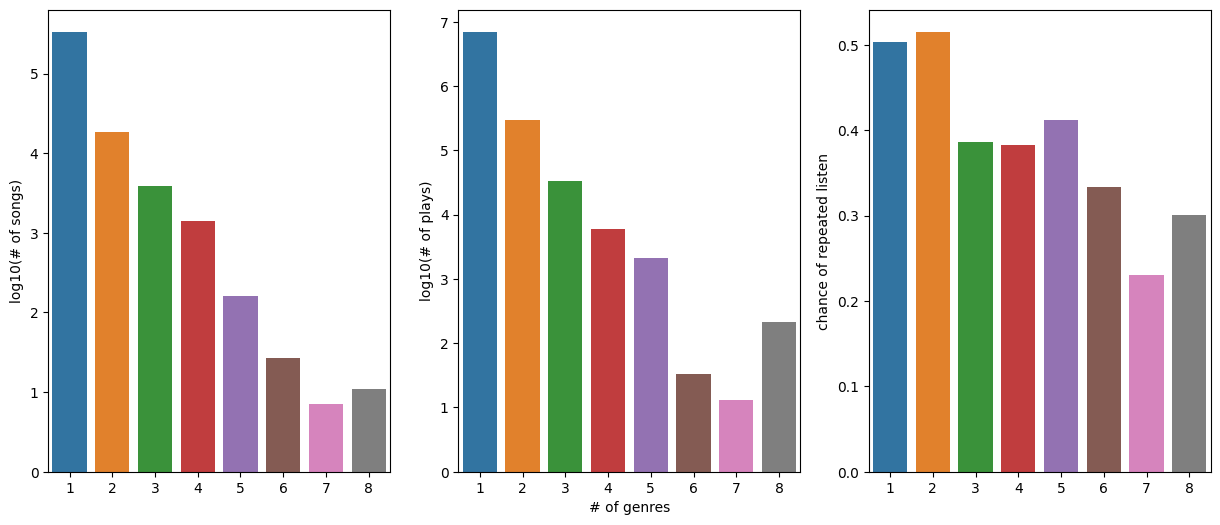

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Диаграммы для жанров
sns.barplot(x=x_genres, y=np.log10(y_genres), ax=axes[0])
axes[0].set_ylabel('log10(# of songs)')

sns.barplot(x=x_genres, y=np.log10(y_plays_g), ax=axes[1])
axes[1].set_ylabel('log10(# of plays)')

sns.barplot(x=x_genres, y=y_repeat_chance_g, ax=axes[2])
axes[1].set_xlabel('# of genres')
axes[2].set_ylabel('chance of repeated listen')

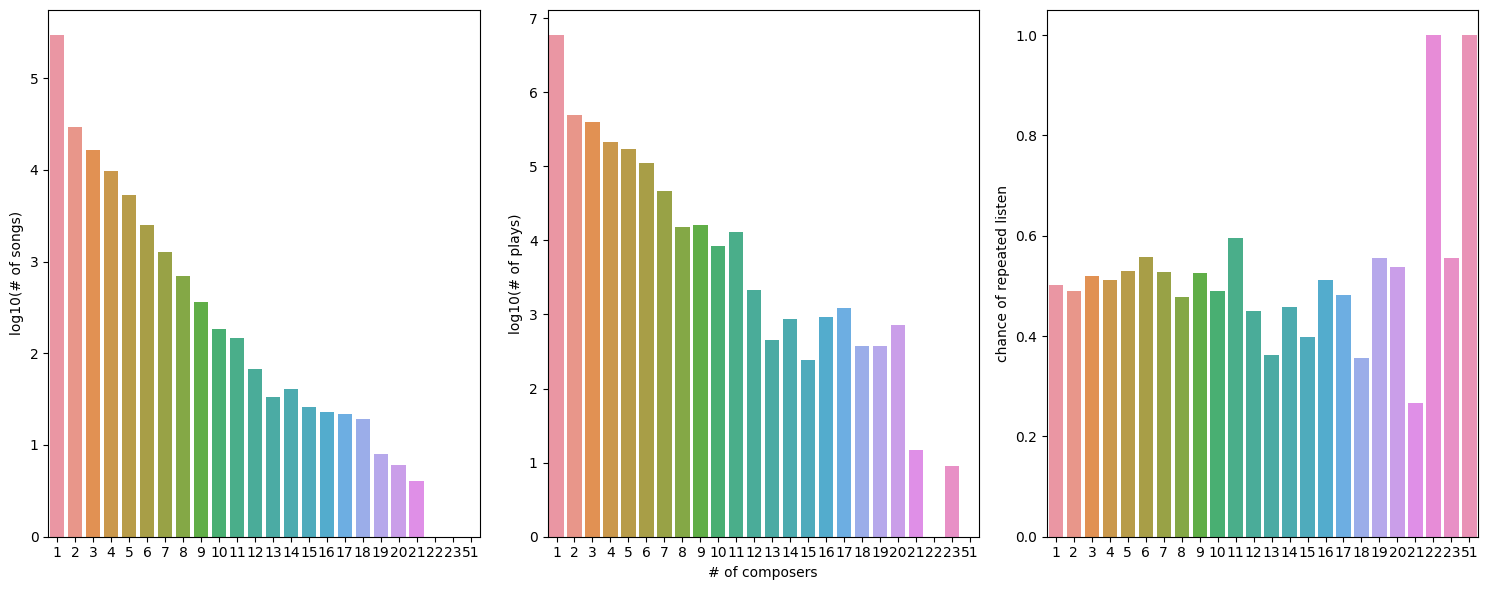

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Диаграммы для композиторов
sns.barplot(x=x_composers_fixed, y=np.log10(y_composers_fixed), ax=axes[0])
axes[0].set_ylabel('log10(# of songs)')

sns.barplot(x=x_composers_fixed, y=np.log10(y_plays_c), ax=axes[1])
axes[1].set_ylabel('log10(# of plays)')

sns.barplot(x=x_composers_fixed, y=y_repeat_chance_c, ax=axes[2])
axes[1].set_xlabel('# of composers')
axes[2].set_ylabel('chance of repeated listen')
plt.tight_layout()
plt.show()

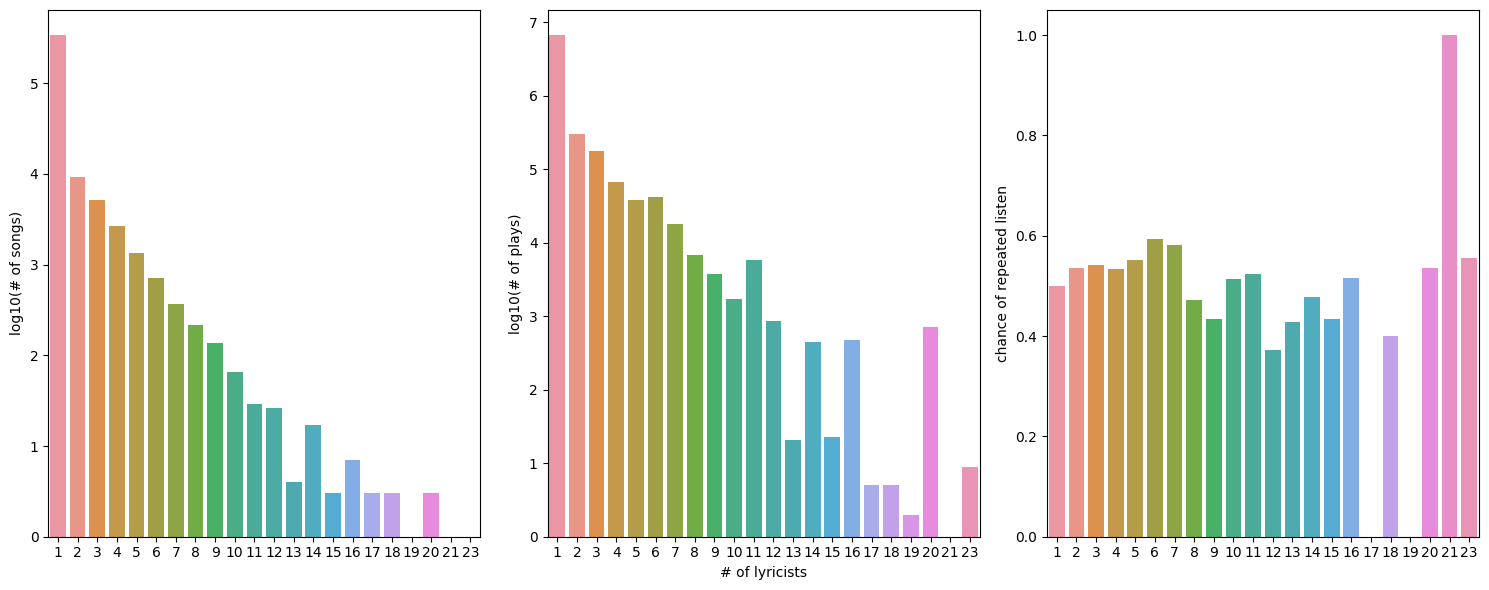

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Диаграммы для авторов
sns.barplot(x=x_lyricists_fixed, y=np.log10(y_lyricists_fixed), ax=axes[0])
axes[0].set_ylabel('log10(# of songs)')

sns.barplot(x=x_lyricists_fixed, y=np.log10(y_plays_l), ax=axes[1])
axes[1].set_ylabel('log10(# of plays)')

sns.barplot(x=x_lyricists_fixed, y=y_repeat_chance_l, ax=axes[2])
axes[1].set_xlabel('# of lyricists')
axes[2].set_ylabel('chance of repeated listen')

plt.tight_layout()
plt.show()


In [30]:
song_data['language'].unique()

array([45., 52., -1.,  3., 10., 24., 31., 17., 59., 38., nan])

In [31]:
languages = song_data['language'].unique()
print(languages.shape[0])

language_count = []
language_plays = []
language_repeat_chance = []

for l in languages:
    if not np.isnan(l):
        songs_with_language = song_data[song_data['language']==l]
        count = songs_with_language['plays'].sum()
        language_repeat_chance.append(songs_with_language['repeat_events'].sum() / count)
        language_count.append(songs_with_language.shape[0])
        language_plays.append(count)
    else:
        songs_with_language = song_data[pd.isnull(song_data['language'])]
        count = songs_with_language['plays'].sum()
        language_repeat_chance.append(songs_with_language['repeat_events'].sum() / count)
        language_count.append(songs_with_language.shape[0])
        language_plays.append(count)
        
languages[10] = -100

11


Text(0.5, 0, 'Song language')

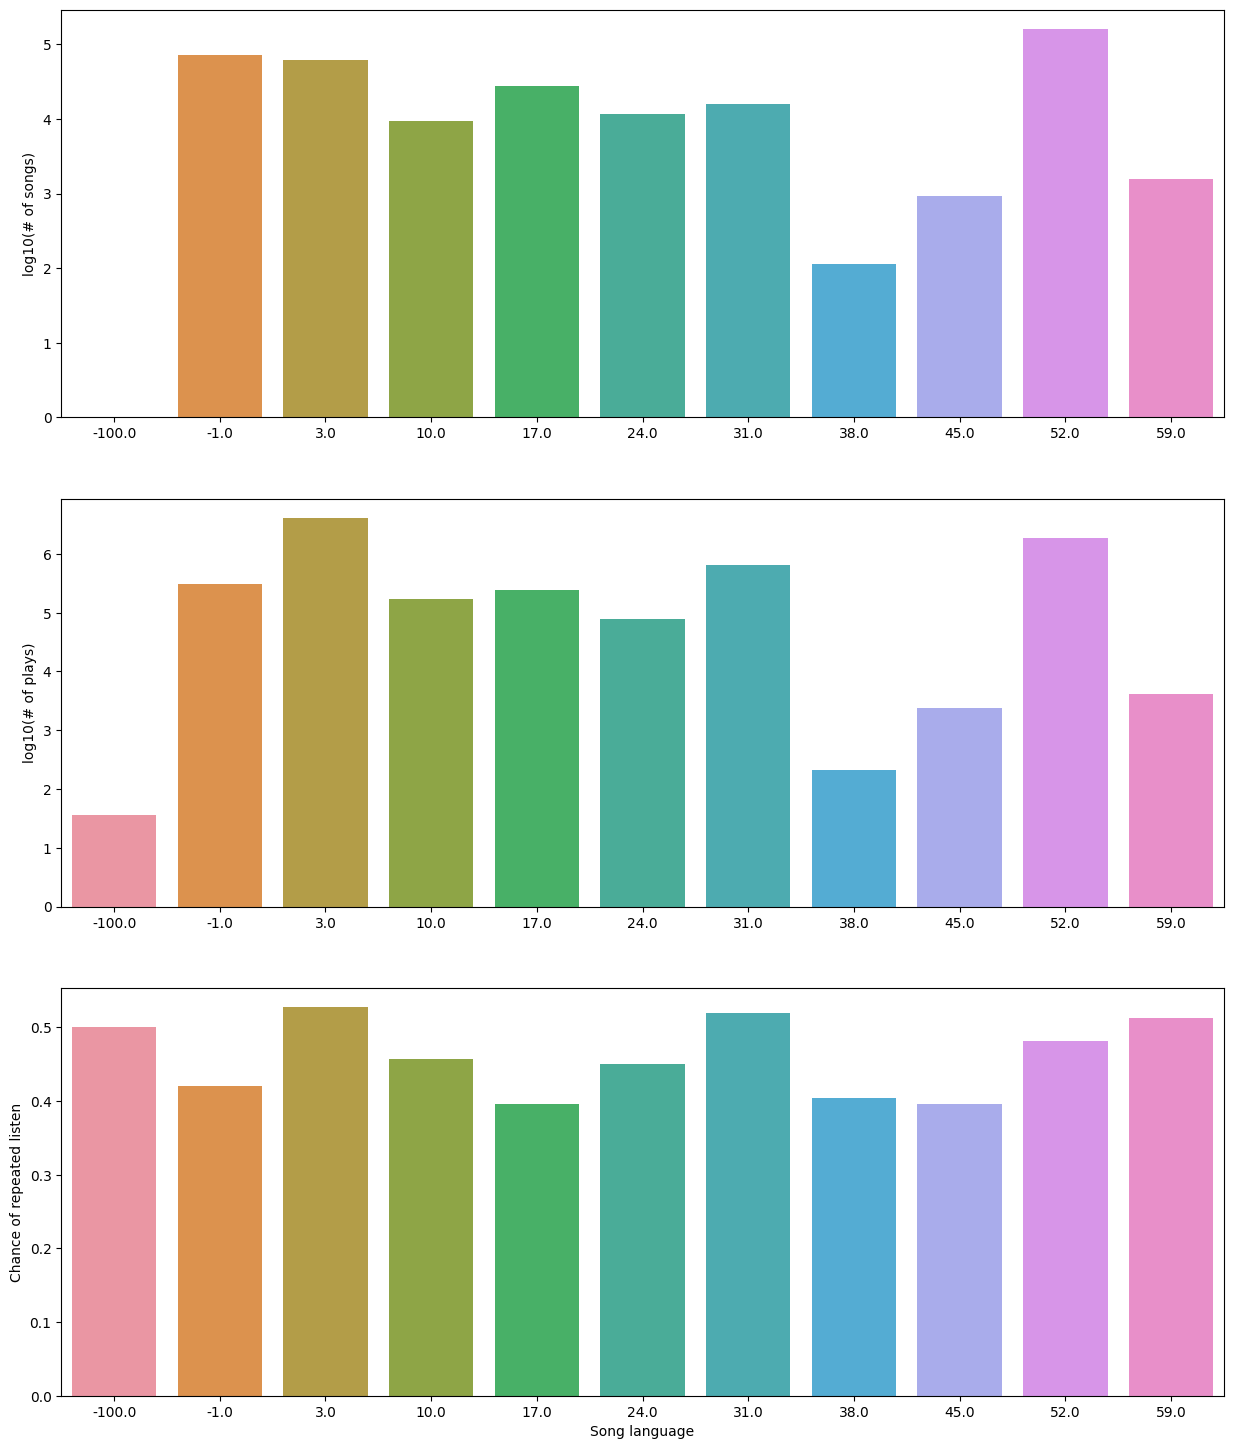

In [32]:
fig = plt.figure(figsize=(15, 18)) 

ax1 = plt.subplot(3,1,1)
sns.barplot(x=languages,y=np.log10(language_count))
ax1.set_ylabel('log10(# of songs)')
ax2 = plt.subplot(3,1,2)
sns.barplot(x=languages,y=np.log10(language_plays))
ax2.set_ylabel('log10(# of plays)')
ax3 = plt.subplot(3,1,3)
sns.barplot(x=languages,y=language_repeat_chance)
ax3.set_ylabel('Chance of repeated listen')
ax3.set_xlabel('Song language')

In [33]:
min_song_length_sec = song_data['song_length'].min() / 1000  # the data is in msec
max_song_length_sec = song_data['song_length'].max() / 1000
print(min_song_length_sec, max_song_length_sec)

1.393 10851.706


In [34]:
min_length_song = song_data.iloc[song_data['song_length'].idxmin()]
max_length_song = song_data.iloc[song_data['song_length'].idxmax()]
print(min_length_song[['artist_name', 'composer', 'lyricist', 'number_of_composers',
                       'number_of_lyricists', 'song_length', 'chance']], '\n')
print(max_length_song[['artist_name', 'composer', 'lyricist', 'number_of_composers',
                       'number_of_lyricists', 'song_length', 'chance']])

artist_name                          Trisha Yearwood
composer               Robert E. Irving| Kevin Quinn
lyricist                                         NaN
number_of_composers                                2
number_of_lyricists                                1
song_length                                     1393
chance                                           1.0
Name: 11441, dtype: object 

artist_name            Jason Stephenson
composer               Jason Stephenson
lyricist                            NaN
number_of_composers                   1
number_of_lyricists                   1
song_length                    10851706
chance                              1.0
Name: 86377, dtype: object


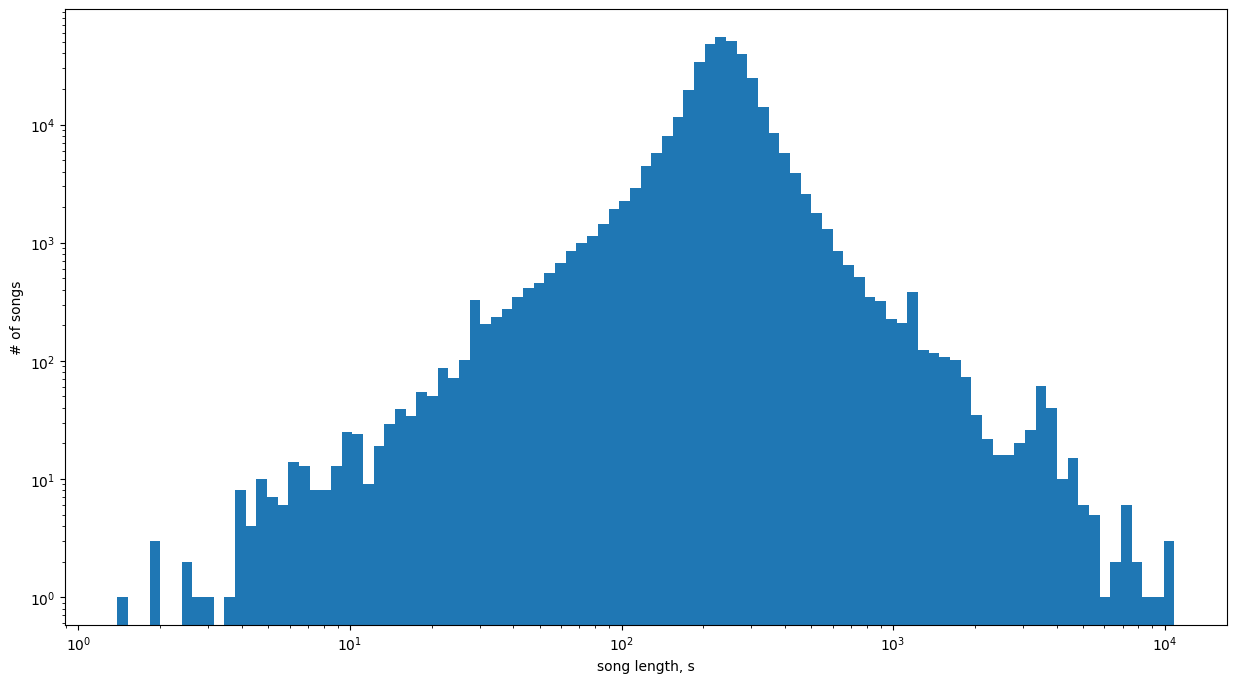

In [38]:
plt.figure(figsize=(15,8))
length_bins = np.logspace(np.log10(min_song_length_sec),np.log10(max_song_length_sec+1),100)
sns.distplot(song_data['song_length']/1000, bins=length_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('song length, s')
plt.ylabel('# of songs')
plt.yscale('log')
plt.xscale('log')
# song_data.hist(column='song_length', bins=100)

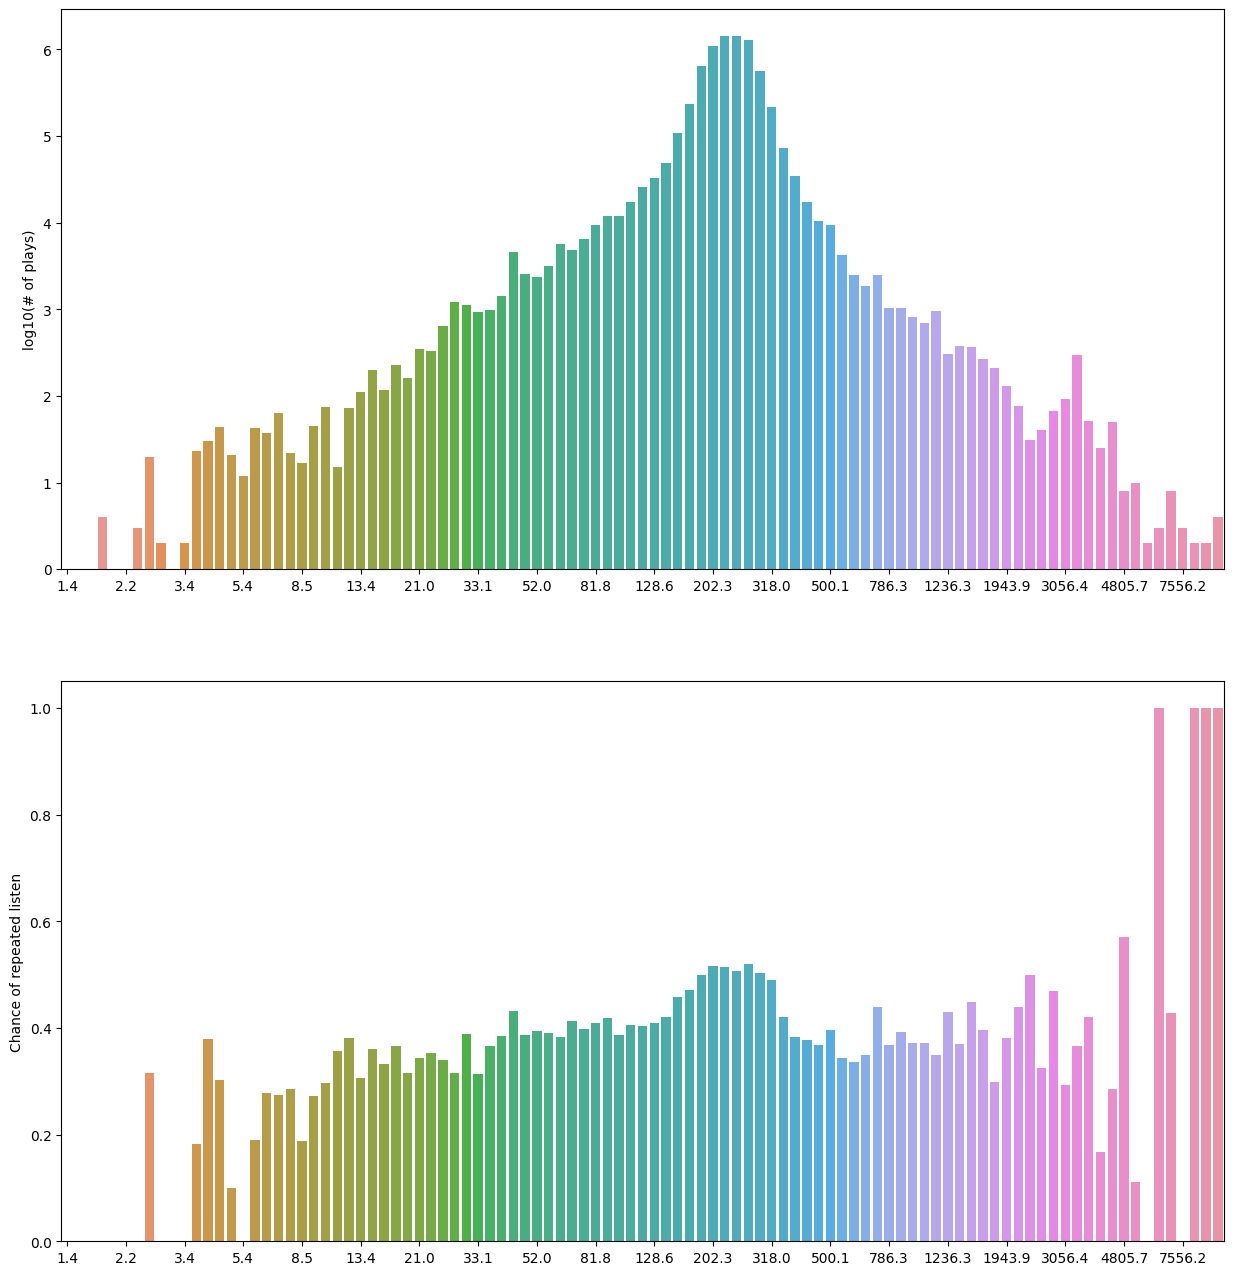

In [39]:
time_labels = list(range(length_bins.shape[0]-1))
song_data['time_cuts'] = pd.cut(song_data['song_length']/1000,
                                bins=length_bins, labels=time_labels)

y_repeat_chance_tc = []
y_plays_tc = []
y_rel_plays = []
for i in time_labels:
    timecut_i = song_data[song_data['time_cuts']==i]
    count = timecut_i['plays'].sum()
    y_plays_tc.append(count)
    if count != 0:
        y_repeat_chance_tc.append(timecut_i['repeat_events'].sum() / count)
        y_rel_plays.append(count / timecut_i.shape[0])
    else:
        y_repeat_chance_tc.append(0)
        y_rel_plays.append(0)
    
fig = plt.figure(figsize=(15, 16)) 

y_plays_tc = [yptc + 1 for yptc in y_plays_tc]  # otherwise we'll get errors when we take the log

ax211 = plt.subplot(2,1,1)
sns.barplot(x=np.round(length_bins[time_labels], 1),y=np.log10(y_plays_tc))
ax211.set_xticks(np.arange(0, len(time_labels), step=5))
ax211.set_ylabel('log10(# of plays)')

ax212 = plt.subplot(2,1,2)
sns.barplot(x=np.round(length_bins[time_labels], 1),y=y_repeat_chance_tc)
ax212.set_xticks(np.arange(0, len(time_labels), step=5))
ax212.set_ylabel('Chance of repeated listen')
_ = plt.show()

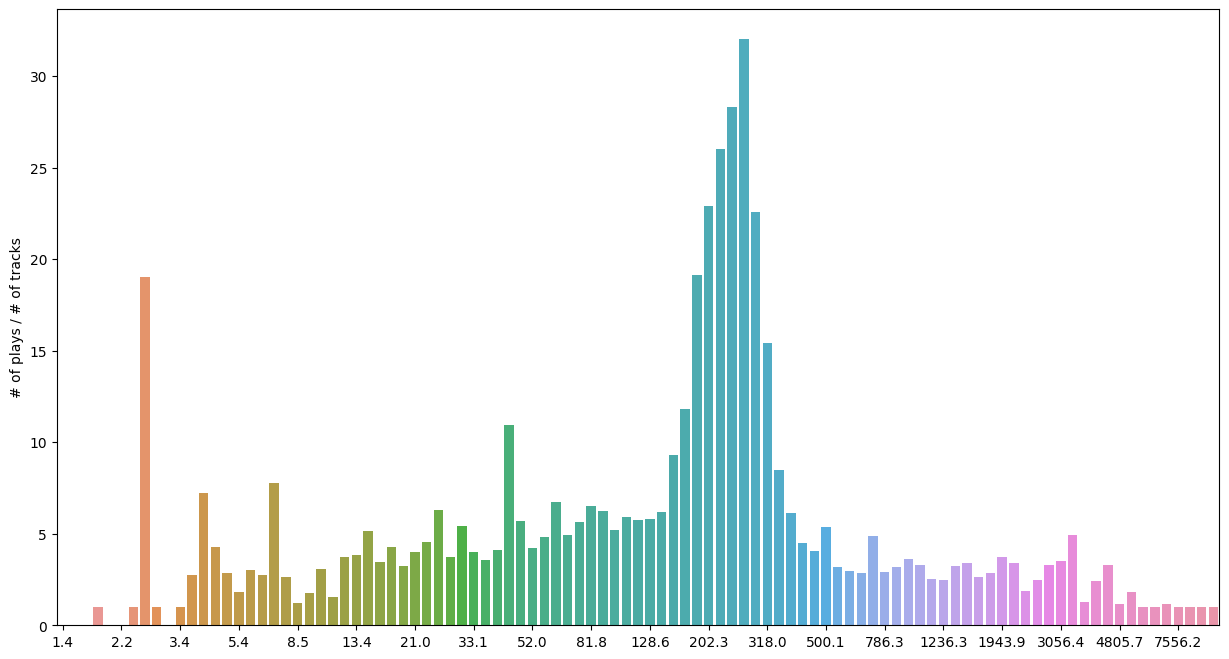

In [40]:
fig = plt.figure(figsize=(15, 8)) 

ax111 = plt.subplot(1,1,1)
sns.barplot(x=np.round(length_bins[time_labels], 1),y=y_rel_plays)
ax111.set_ylabel('# of plays / # of tracks')
ax111.set_xticks(np.arange(0, len(time_labels), step=5))

_ = plt.show()

In [43]:
max_tracks = song_data['artist_name'].value_counts().max()
print(song_data['artist_name'].value_counts()[:4])

artist_name
Various Artists       17080
証聲音樂圖書館 ECHO MUSIC     3997
貴族精選                   1211
霹靂布袋戲劇集原聲帶              937
Name: count, dtype: int64


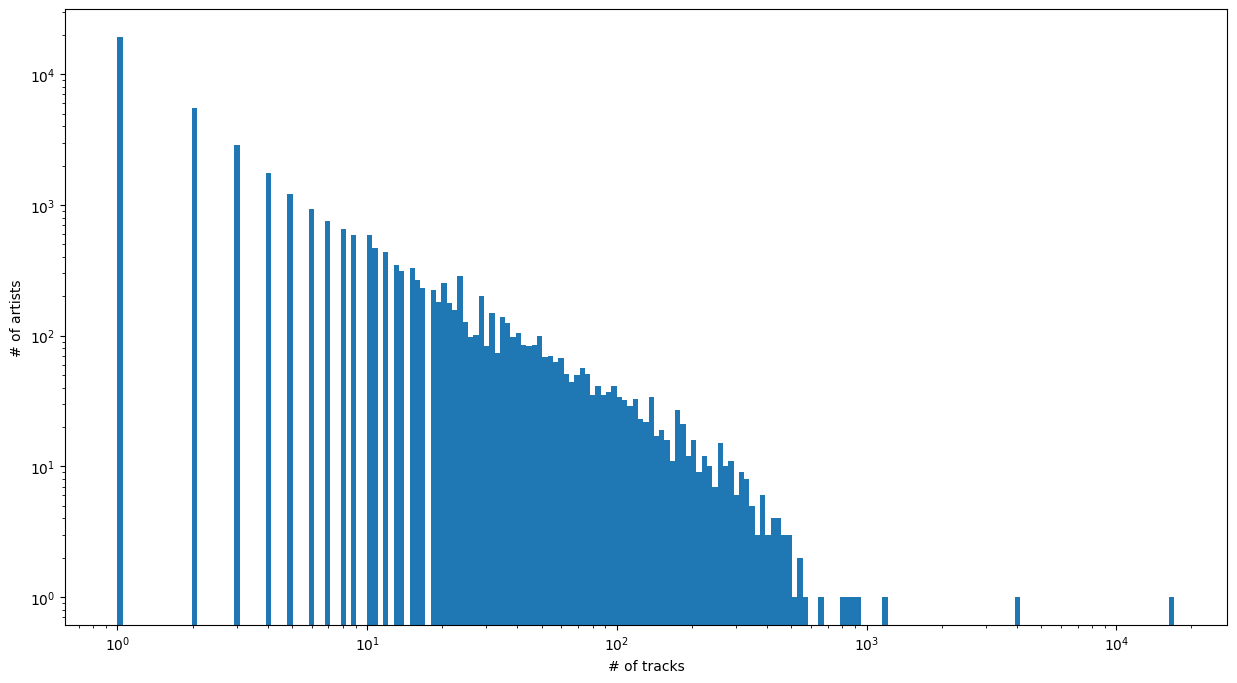

In [44]:
plt.figure(figsize=(15,8))
track_bins = np.logspace(0,np.log10(max_tracks+1),200)
# track_bins = np.linspace(1,max_tracks+1,100)
sns.distplot(song_data['artist_name'].value_counts(), bins=track_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('# of tracks')
plt.ylabel('# of artists')
plt.yscale('log')
plt.xscale('log')

In [45]:
artist_groupby = song_data[['artist_name', 'plays']].groupby(['artist_name'])
artist_plays = artist_groupby['plays'].agg(['sum'])
artist_plays.reset_index(inplace=True)

min_plays = artist_plays['sum'].min()
max_plays = artist_plays['sum'].max()
print(min_plays, max_plays)

1 303616


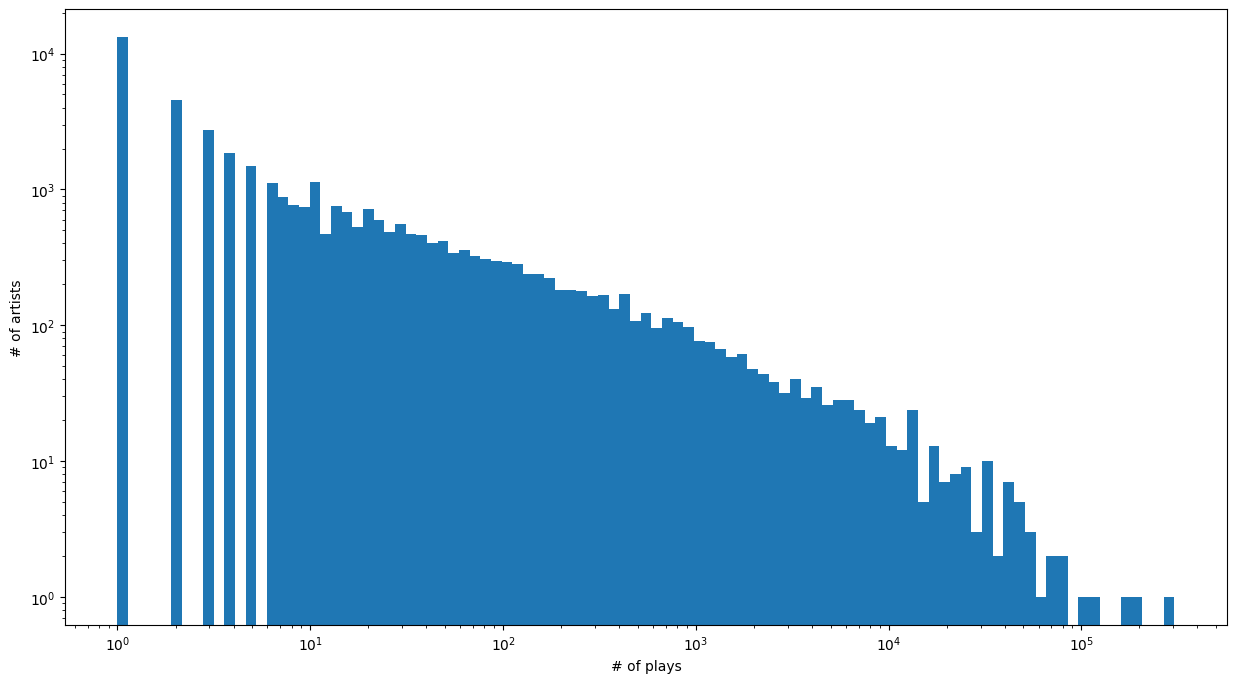

In [46]:
plt.figure(figsize=(15,8))
play_bins = np.logspace(np.log10(min_plays),np.log10(max_plays+1),100)
# track_bins = np.linspace(1,max_tracks+1,100)
sns.distplot(artist_plays['sum'], bins=play_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('# of plays')
plt.ylabel('# of artists')
plt.yscale('log')
plt.xscale('log')

In [47]:
artist_replgroupby = song_data[['artist_name', 'plays', 'repeat_events']].groupby(['artist_name'])
artist_replgroupby = artist_replgroupby[['plays', 'repeat_events']].agg(['sum', 'count'])
artist_replgroupby.reset_index(inplace=True)
artist_replgroupby.columns = list(map(''.join, artist_replgroupby.columns.values))
artist_replgroupby.drop(['repeat_eventscount'], axis=1, inplace=True)
artist_replgroupby.columns = ['artist', 'plays', 'tracks', 'repeat_events']
artist_replgroupby['repeat_play_chance'] = artist_replgroupby['repeat_events'] / artist_replgroupby['plays']

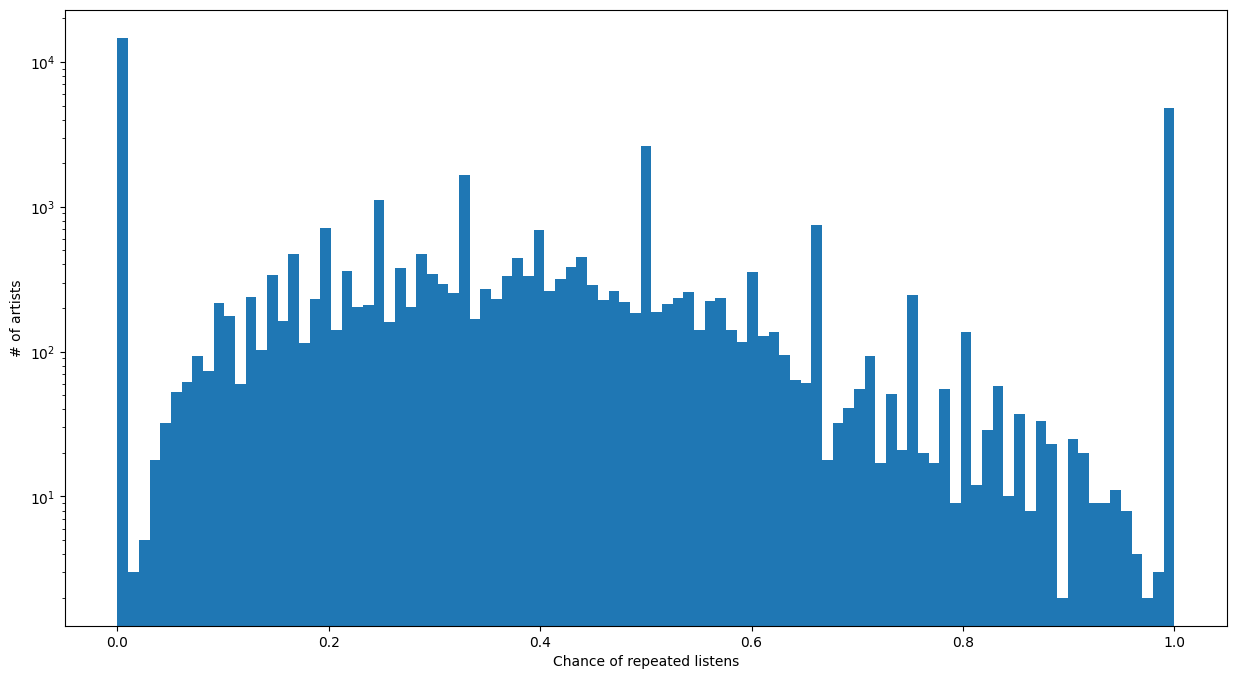

In [48]:
plt.figure(figsize=(15,8))
chance_bins = np.linspace(0,1,100)
sns.distplot(artist_replgroupby['repeat_play_chance'], bins=chance_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('Chance of repeated listens')
plt.ylabel('# of artists')
plt.yscale('log')
# plt.xscale('log')

In [49]:
artist_replgroupby['plays'].max()

303616

Text(0, 0.5, 'Chance of repeated listen')

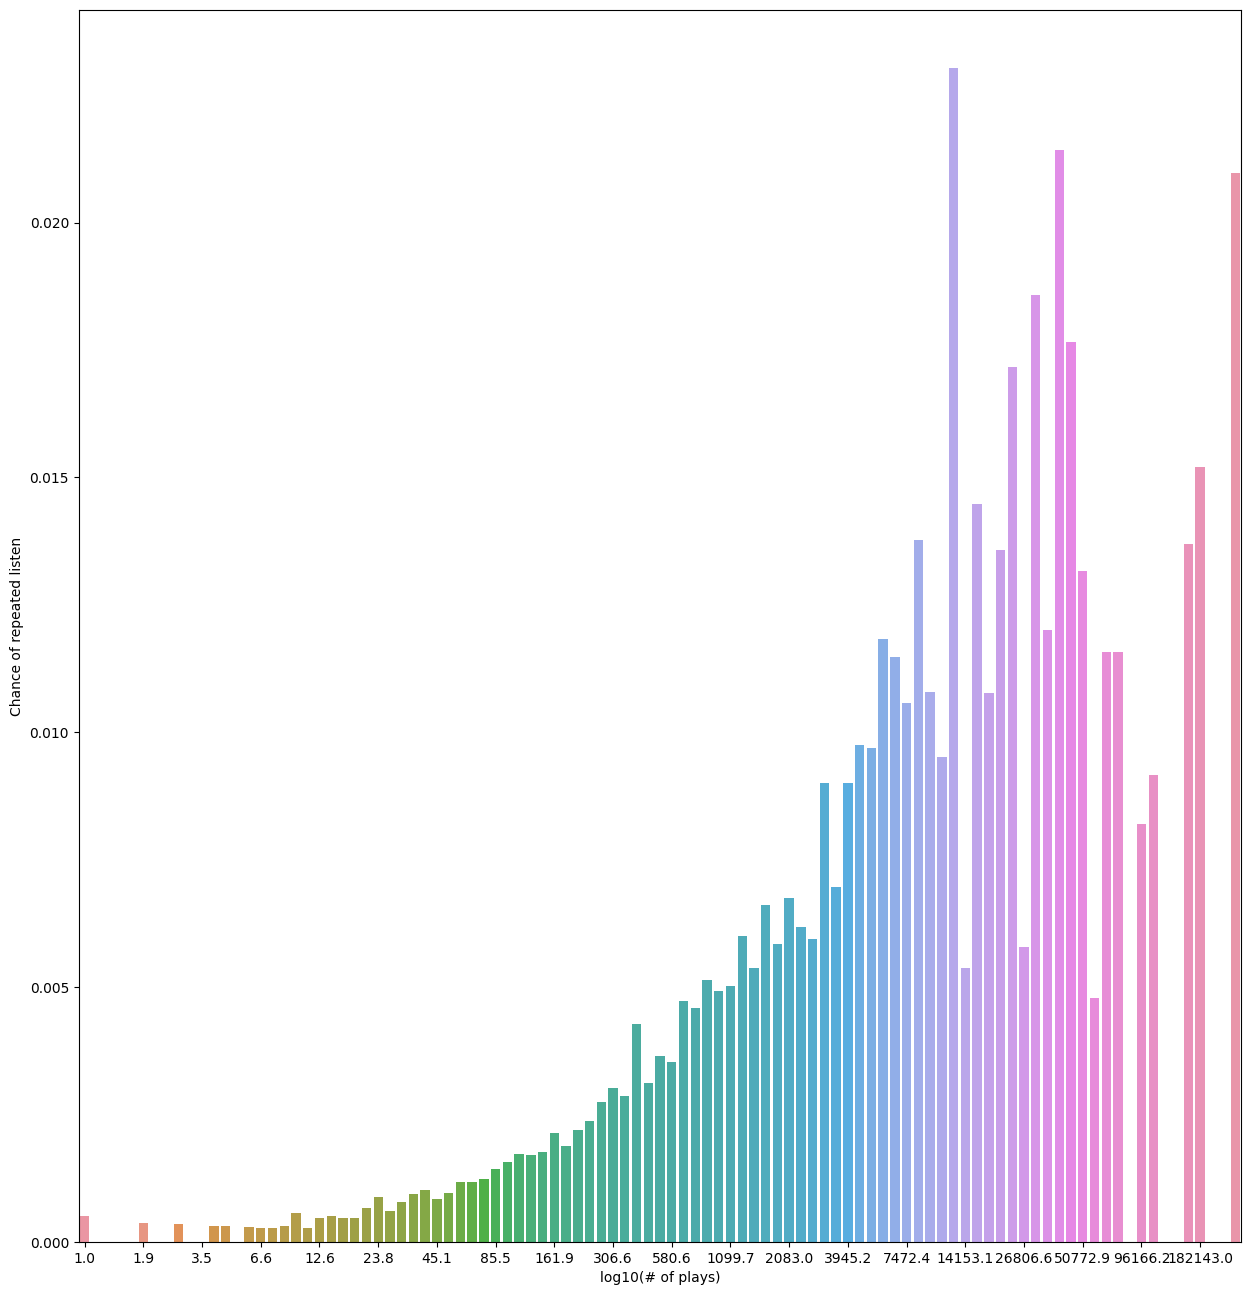

In [50]:
play_bins = np.logspace(-0.01, np.log10(artist_replgroupby['plays'].max()), 100)
play_labels = list(range(play_bins.shape[0]-1))
artist_replgroupby['play_cuts'] = pd.cut(artist_replgroupby['plays'],
                                         bins=play_bins, labels=play_labels)

y_repeat_chance_p = []
y_plays_p = []
for i in play_labels:
    playcut_i = artist_replgroupby[artist_replgroupby['play_cuts']==i]
    count = artist_replgroupby['plays'].sum()
    y_plays_p.append(count)
    if count != 0:
        y_repeat_chance_p.append(playcut_i['repeat_events'].sum() / count)
    else:
        y_repeat_chance_p.append(0)
    
fig = plt.figure(figsize=(15, 16)) 

ax111 = plt.subplot(1,1,1)
sns.barplot(x=np.round(play_bins[play_labels], 1),y=y_repeat_chance_p)
ax111.set_xlabel('log10(# of plays)')
ax111.set_xticks(np.arange(0, len(play_labels), step=5))
ax111.set_ylabel('Chance of repeated listen')

Text(0, 0.5, 'Chance of repeated listen')

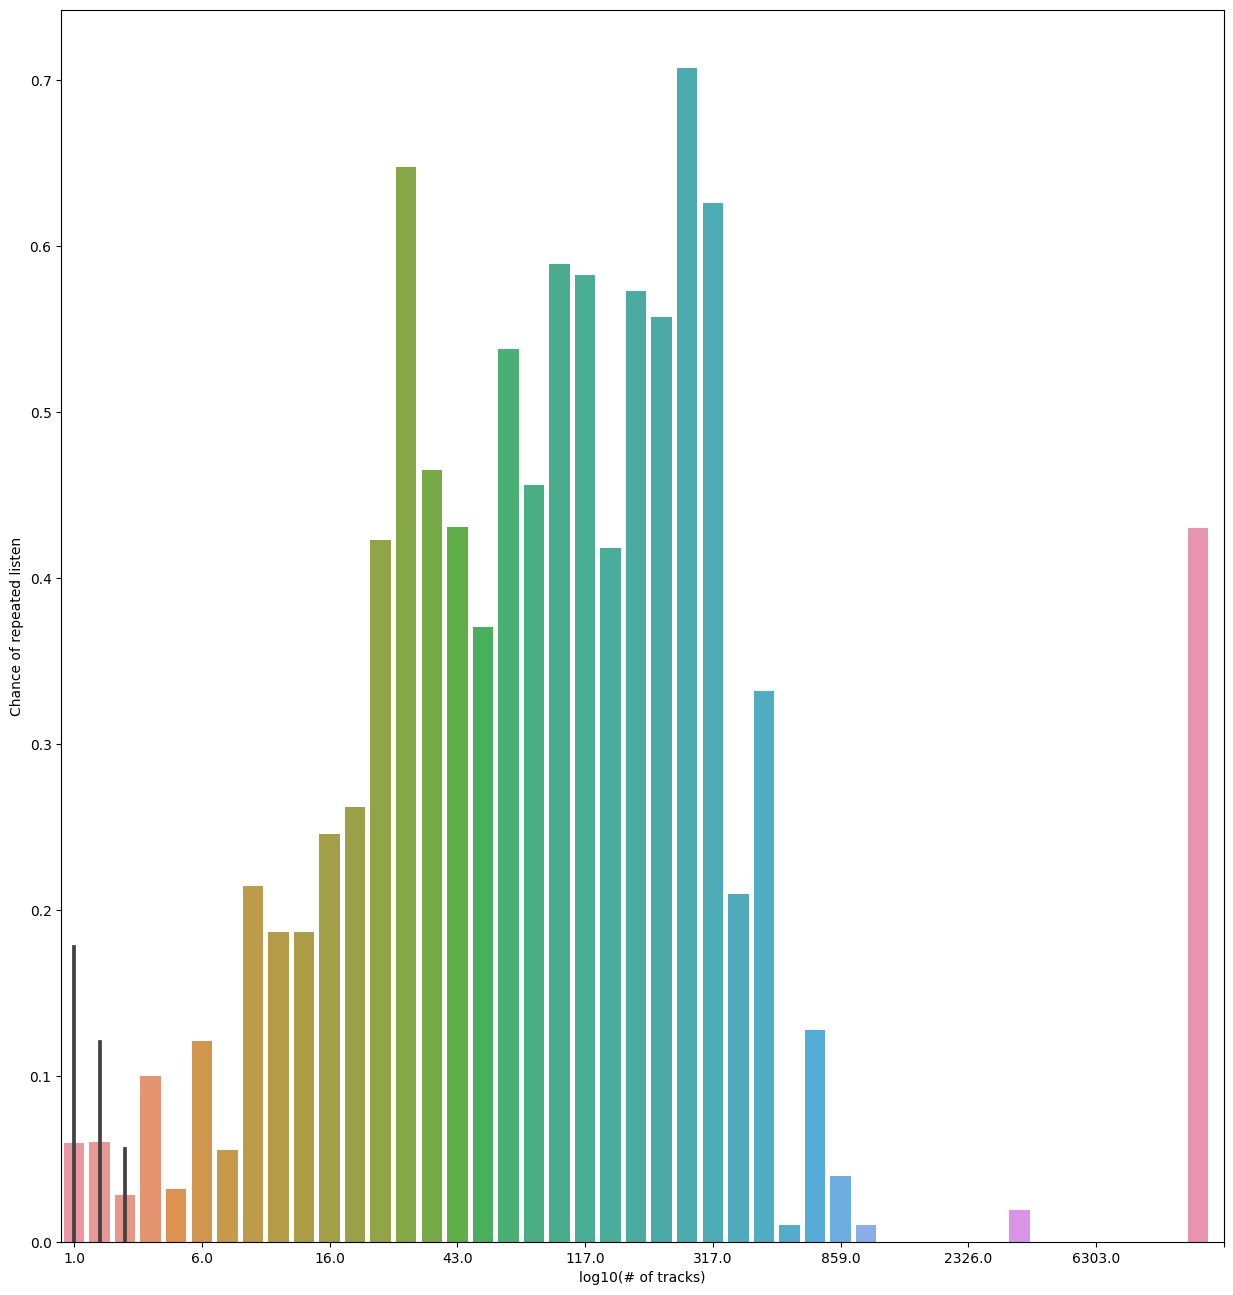

In [51]:
track_bins = np.logspace(-0.01, np.log10(artist_replgroupby['tracks'].max()), 50)
track_labels = list(range(track_bins.shape[0]-1))
artist_replgroupby['track_cuts'] = pd.cut(artist_replgroupby['tracks'],
                                          bins=track_bins, labels=track_labels)

y_repeat_chance_t = []
y_tracks_t = []
for i in track_labels:
    trackcut_i = artist_replgroupby[artist_replgroupby['track_cuts']==i]
    count = artist_replgroupby['tracks'].sum()
    y_tracks_t.append(count)
    if count != 0:
        y_repeat_chance_t.append(trackcut_i['repeat_events'].sum() / count)
    else:
        y_repeat_chance_t.append(0)
    
fig = plt.figure(figsize=(15, 16)) 

ax111 = plt.subplot(1,1,1)
sns.barplot(x=np.round(track_bins[track_labels]),y=y_repeat_chance_t)
ax111.set_xticks(np.arange(0, len(track_labels), step=5))
ax111.set_xlabel('log10(# of tracks)')
ax111.set_ylabel('Chance of repeated listen')

In [52]:
artist_langgroupby = song_data[['artist_name',  'language']].groupby(['artist_name'])
artist_langgroupby = artist_langgroupby.agg({"language": pd.Series.nunique})
artist_langgroupby.reset_index(inplace=True)
artist_langgroupby.columns = list(map(''.join, artist_langgroupby.columns.values))
artist_langgroupby.columns = ['artist', 'language']

artist_repl_lang = artist_replgroupby.merge(artist_langgroupby, on='artist')

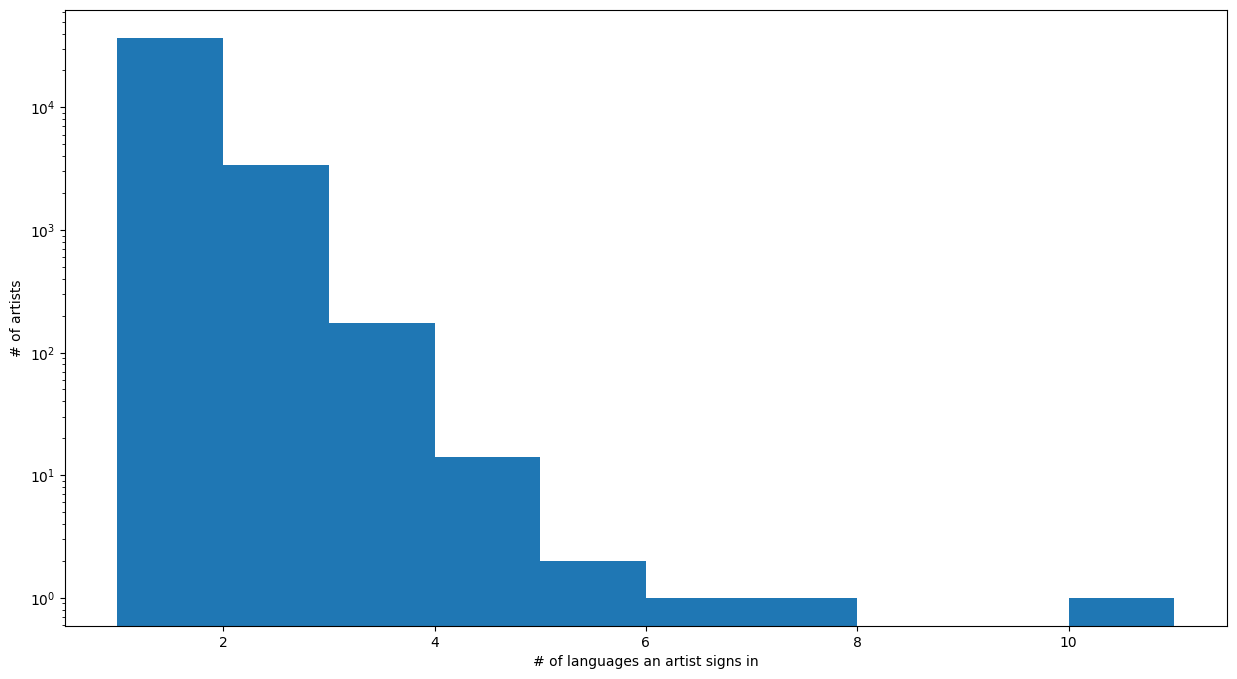

In [53]:
plt.figure(figsize=(15,8))
chance_bins = np.linspace(1,artist_repl_lang['language'].max()+1,11)
sns.distplot(artist_repl_lang['language'], bins=chance_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('# of languages an artist signs in')
plt.ylabel('# of artists')
plt.yscale('log')

Text(0, 0.5, 'Chance of repeated listen')

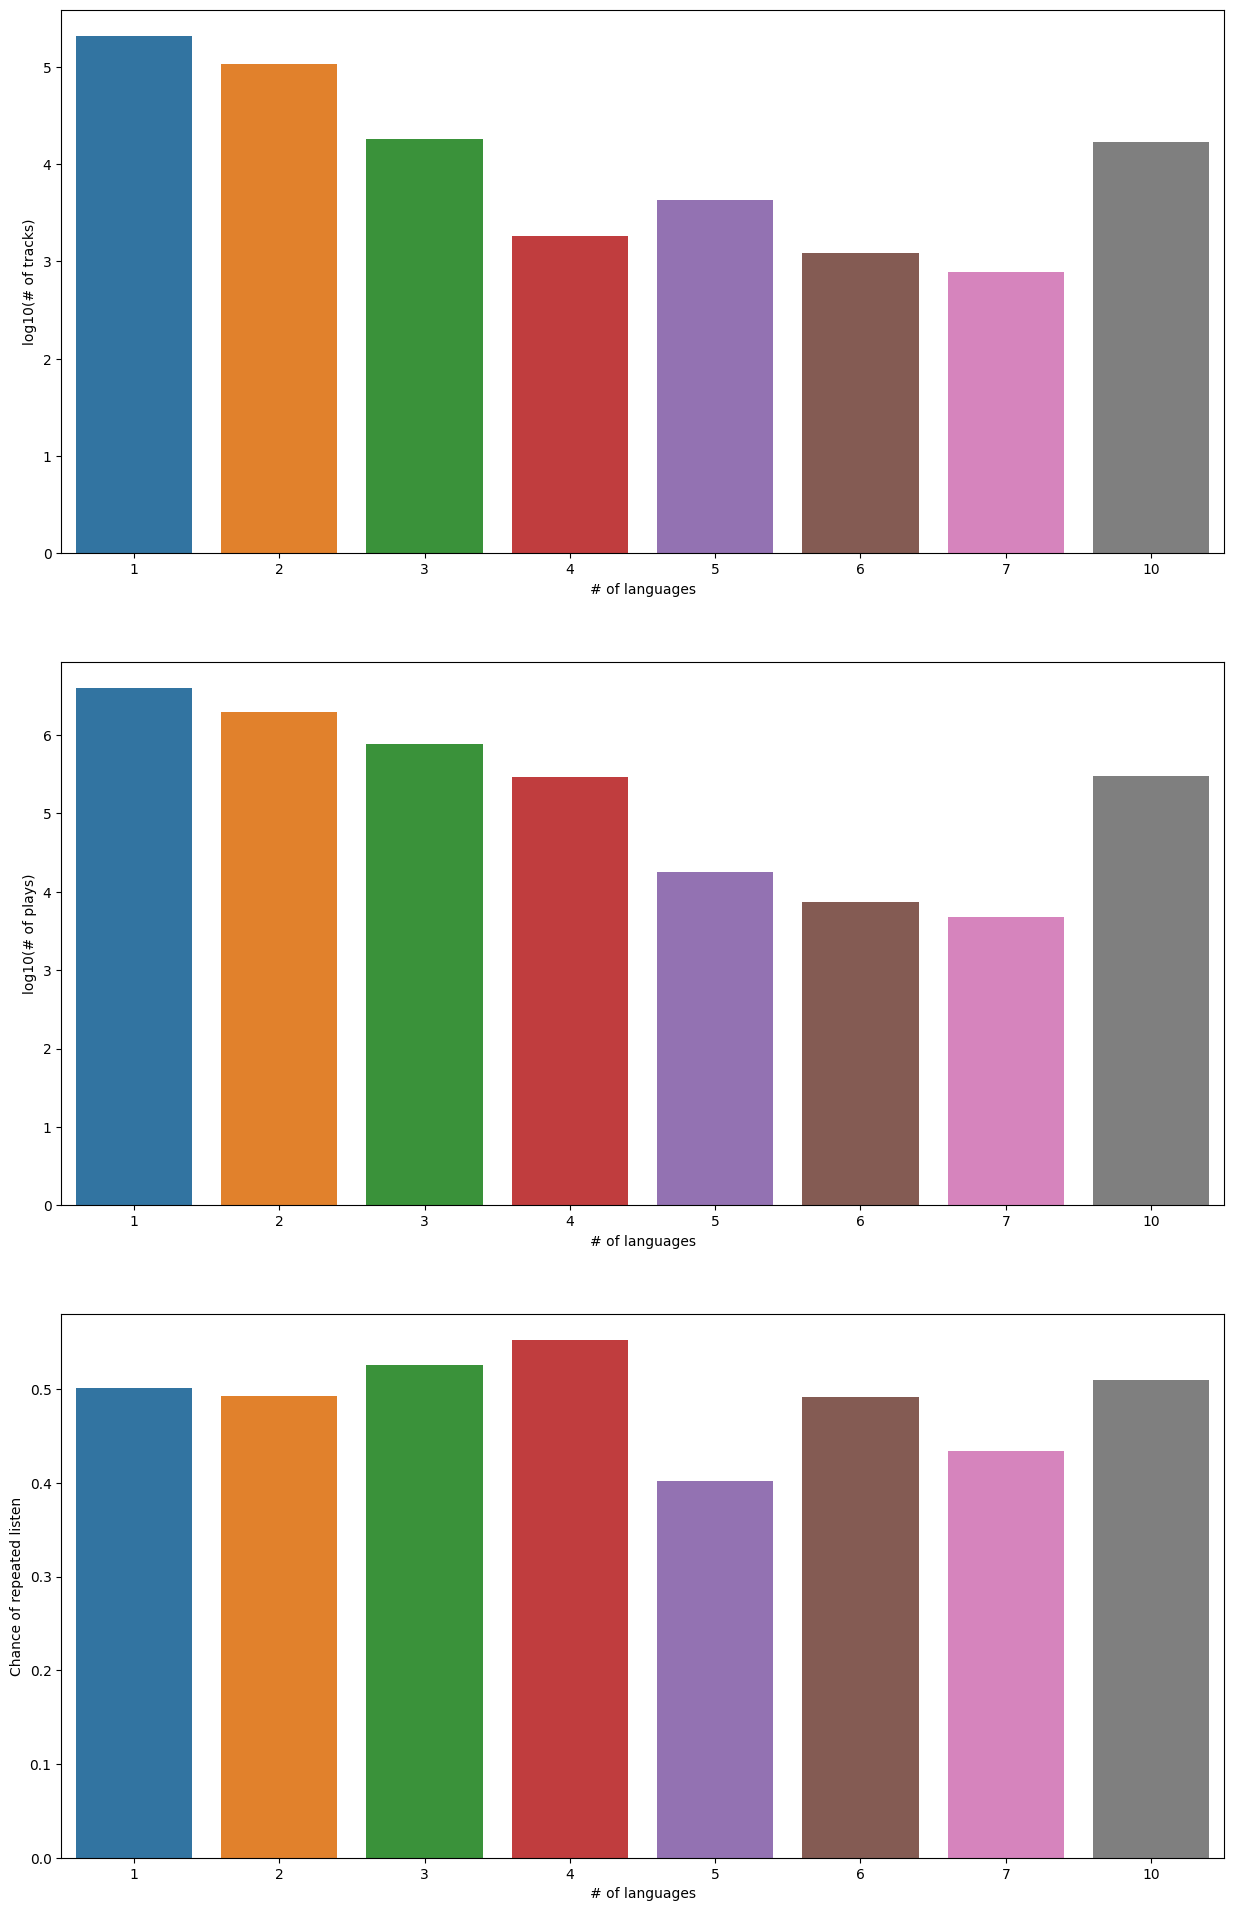

In [54]:
y_repeat_chance_l = []
y_plays_l = []
y_tracks_l = []

max_l = int(artist_repl_lang['language'].max())
l_list = []

for i in range(1,max_l+1):
    arlang = artist_repl_lang[artist_repl_lang['language']==i]
    count = arlang['plays'].sum()
    if count != 0:
        y_tracks_l.append(arlang['tracks'].sum())
        y_plays_l.append(count)
        l_list.append(i)
        y_repeat_chance_l.append(arlang['repeat_events'].sum() / count)
    
fig = plt.figure(figsize=(15, 24)) 

ax311 = plt.subplot(3,1,1)
sns.barplot(x=l_list,y=np.log10(y_tracks_l))
ax311.set_xlabel('# of languages')
ax311.set_ylabel('log10(# of tracks)')

ax312 = plt.subplot(3,1,2)
sns.barplot(x=l_list,y=np.log10(y_plays_l))
ax312.set_xlabel('# of languages')
ax312.set_ylabel('log10(# of plays)')

ax313 = plt.subplot(3,1,3)
sns.barplot(x=l_list,y=y_repeat_chance_l)
ax313.set_xlabel('# of languages')
ax313.set_ylabel('Chance of repeated listen')

In [55]:
 def split_genres(x, n):
    # n is the number of the genre
    if type(x) != str:
        if n == 1:
            if not np.isnan(x):
                return int(x)
            else:
                return x
    else:
        if x.count('|') >= n-1:
            return int(x.split('|')[n-1])

In [56]:
max_genres = song_data['number_of_genres'].max()

for i in range(1,max_genres+1):
    sp_g = lambda x: split_genres(x, i)
    song_data['genre_'+str(i)] = song_data['genre_ids'].apply(sp_g)
    
n_genres = set()

for i in range(1,max_genres+1):
    n_genres.update(song_data['genre_'+str(i)][song_data['genre_'+str(i)].notnull()].unique().tolist())

In [57]:
len(n_genres), song_data['genre_ids'].isnull().sum()

(166, 7233)

In [58]:
genres_plays = [0] * (len(n_genres) + 1)
genres_tracks = [0] * (len(n_genres) + 1)
genres_replays = [0] * (len(n_genres) + 1)

for i in range(1,max_genres+1):
    notnull_data = song_data[song_data['genre_'+str(i)].notnull()]
    for j, k in enumerate(n_genres):
        jk_sdata = notnull_data[notnull_data['genre_'+str(i)] == k]
        genres_plays[j] += jk_sdata['plays'].sum()
        genres_tracks[j] += jk_sdata['plays'].shape[0]
        genres_replays[j] += jk_sdata['repeat_events'].sum()

null_genre_data = song_data[song_data['genre_1'].isnull()]
genres_plays[len(n_genres)] = null_genre_data['plays'].sum()
genres_tracks[len(n_genres)] = null_genre_data['plays'].shape[0]
genres_replays[len(n_genres)] = null_genre_data['repeat_events'].sum()

genres_rel_plays = [x/y for x, y in zip(genres_plays, genres_tracks)]
genres_repl_chance = [x/y for x, y in zip(genres_replays, genres_plays)]

Text(0, 0.5, 'Chance of repeat listen')

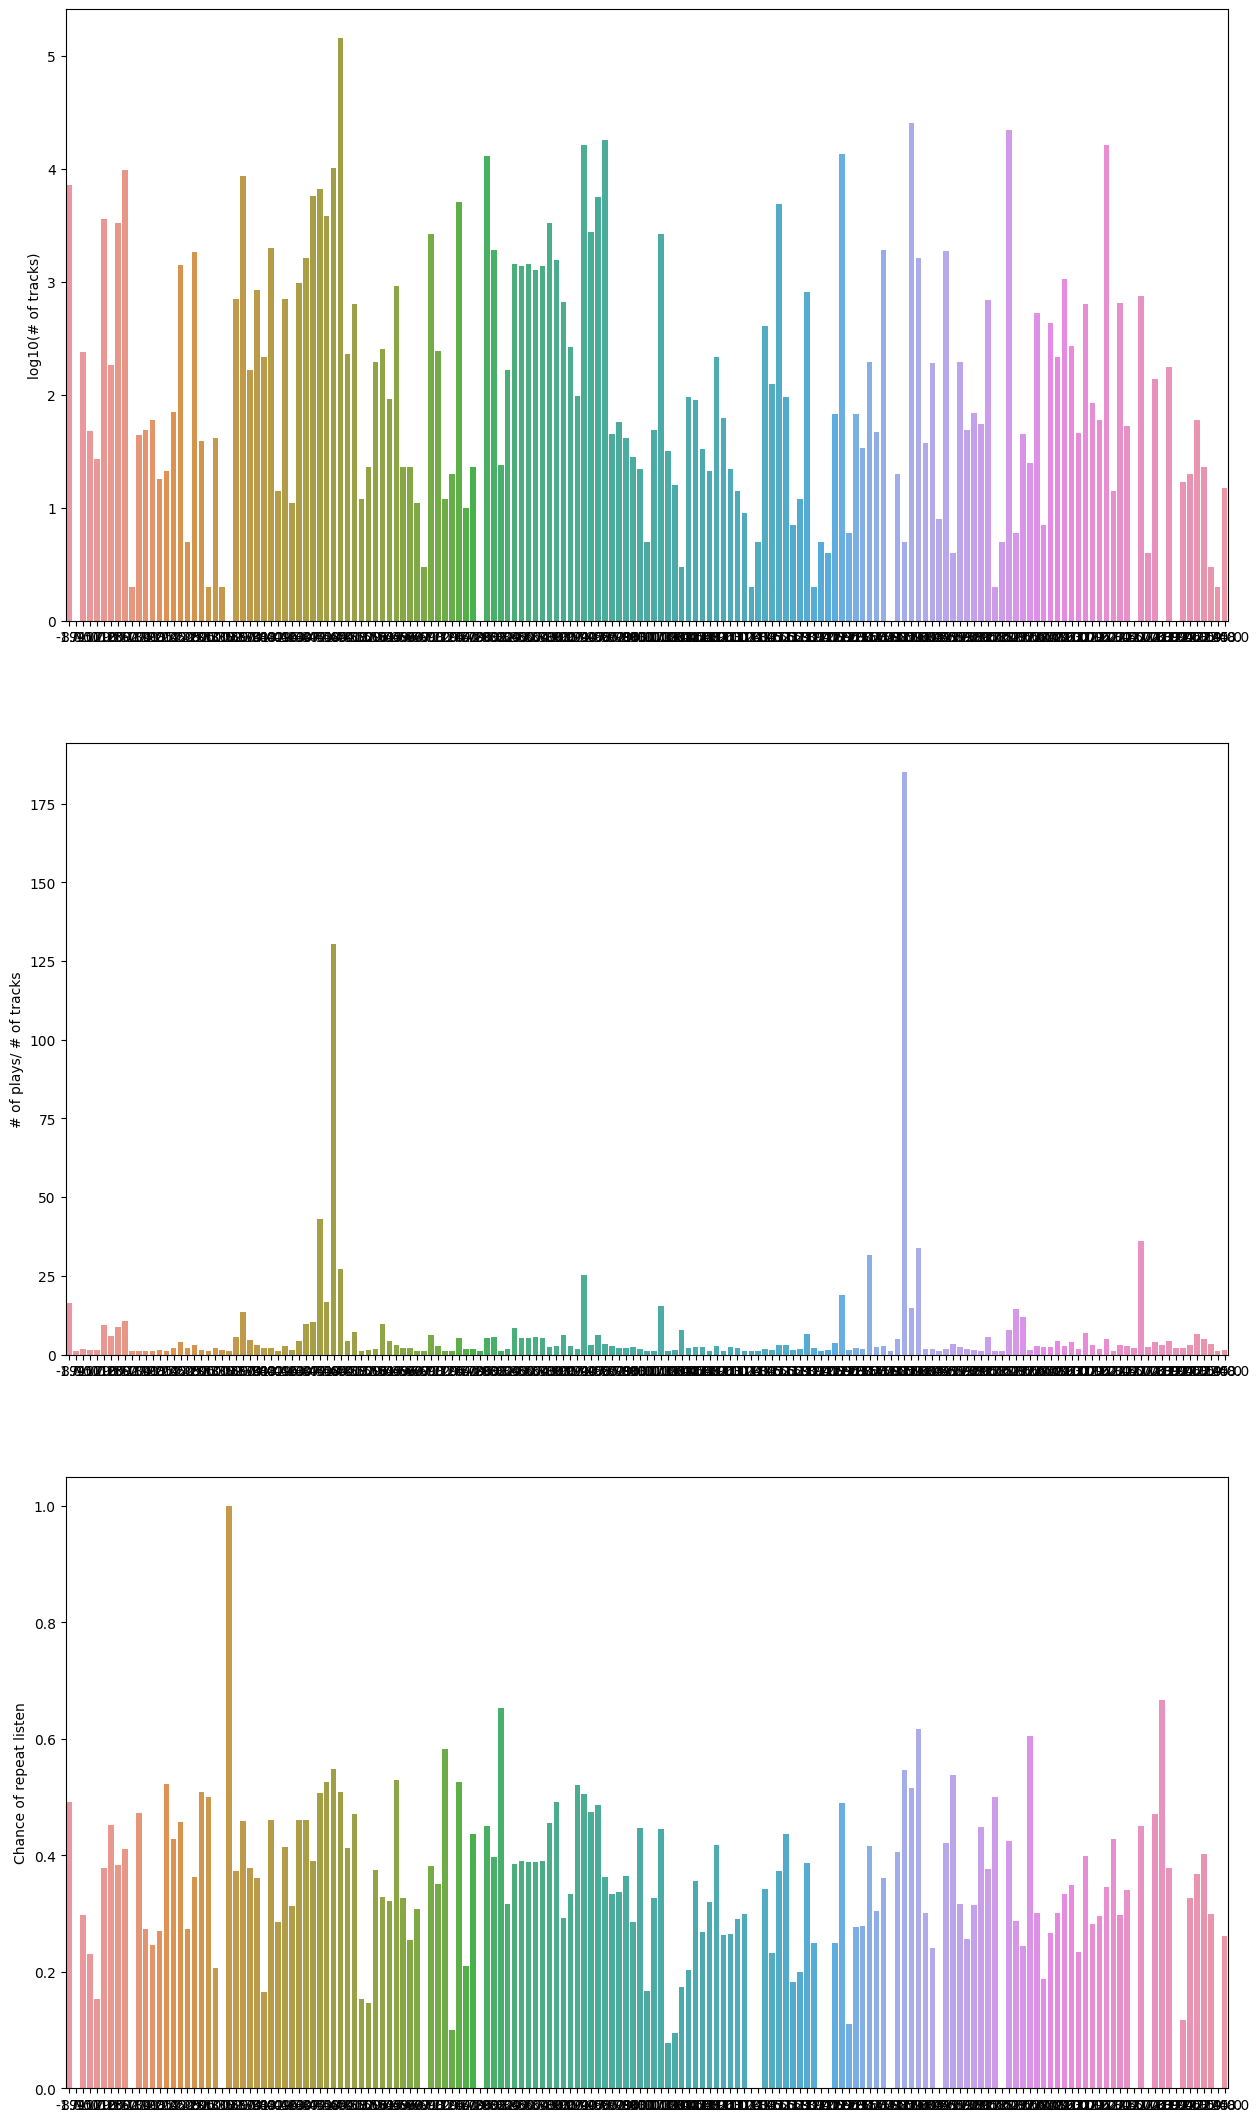

In [59]:
n_g_l = [x for x in n_genres]
n_g_l.append(-1)

fig = plt.figure(figsize=(15, 27)) 

ax411 = plt.subplot(3,1,1)
sns.barplot(x=n_g_l,y=np.log10(genres_tracks))
ax411.set_ylabel('log10(# of tracks)')


ax413 = plt.subplot(3,1,2)
sns.barplot(x=n_g_l,y=genres_rel_plays)
ax413.set_ylabel('# of plays/ # of tracks')

ax414 = plt.subplot(3,1,3)
sns.barplot(x=n_g_l,y=genres_repl_chance)
ax414.set_ylabel('Chance of repeat listen')

Text(0, 0.5, 'log10(# of plays)')

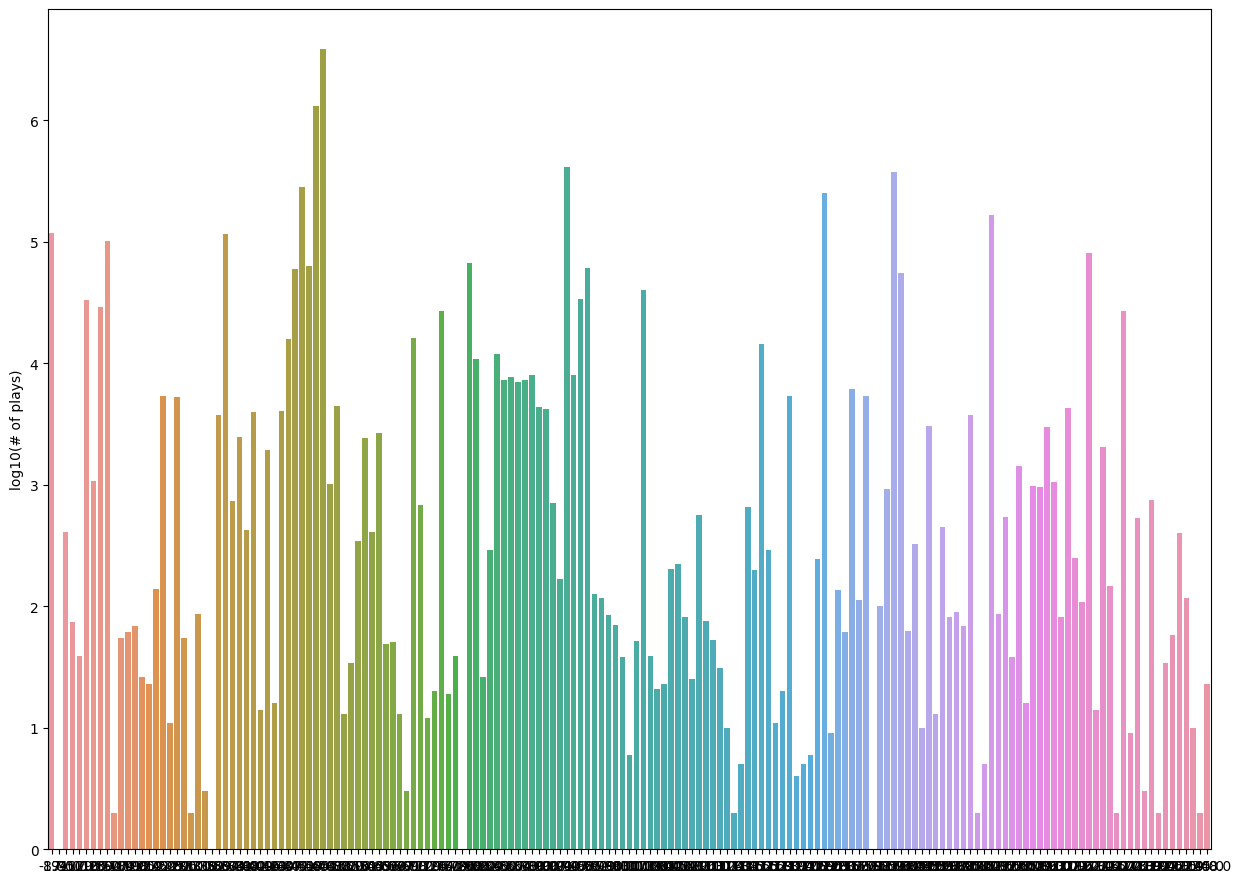

In [60]:
fig = plt.figure(figsize=(15, 24))

ax412 = plt.subplot(2,1,1)
sns.barplot(x=n_g_l,y=np.log10(genres_plays))
ax412.set_ylabel('log10(# of plays)')

In [61]:
test_merged['number_of_genres'] = test_merged['genre_ids'].apply(count_vals)
number_of_genres_test = test_merged['number_of_genres'].max()
print(number_of_genres_test)


for i in range(1,number_of_genres_test+1):
    sp_g = lambda x: split_genres(x, i)
    test_merged['genre_'+str(i)] = test_merged['genre_ids'].apply(sp_g)
    
n_genres_test = set()

for i in range(1,max_genres+1):
    n_genres_test.update(test_merged['genre_'+str(i)][test_merged['genre_'+str(i)].notnull()].unique().tolist())
print(len(n_genres_test))

8
162


In [62]:
c = 0
in_test_not_in_train = []
for g in n_genres_test:
    if g not in n_genres:
        c += 1
        in_test_not_in_train.append(g)
print(c, in_test_not_in_train)

6 [1061.0, 2045.0, 1089.0, 166.0, 765.0, 303.0]


In [63]:
song_genres_test = []
song_genres_artist = []
for g in in_test_not_in_train:
    tmp = 0
    for i in range(1,number_of_genres_test+1):
        tmp_filtered = test_merged[test_merged['genre_'+str(i)]==g]
        tmp += tmp_filtered.shape[0]
        for stt_artist in tmp_filtered['artist_name']:
            song_genres_artist.append(stt_artist)
    song_genres_test.append(tmp)
print(song_genres_test, sum(song_genres_test))
print(set(song_genres_artist))

[2, 2, 1, 10, 2, 1] 18
{'Lea Salonga', 'Lovi', '虐之詩', 'Sebastiano Serafini', 'Paul Simon', 'goldenage (黄金時代)', 'Fabrice Millischer'}


In [64]:
for stt_artist in set(song_genres_artist):
    print(stt_artist, song_data[song_data['artist_name'] == stt_artist].shape[0])
print(song_genres_artist)

Lea Salonga 12
Lovi 0
虐之詩 0
Sebastiano Serafini 0
Paul Simon 26
goldenage (黄金時代) 0
Fabrice Millischer 0
['Lovi', 'Lea Salonga', 'goldenage (黄金時代)', 'goldenage (黄金時代)', 'Sebastiano Serafini', 'Paul Simon', 'Paul Simon', 'Paul Simon', 'Paul Simon', 'Paul Simon', 'Paul Simon', 'Paul Simon', 'Paul Simon', 'Paul Simon', 'Paul Simon', 'Fabrice Millischer', 'Fabrice Millischer', '虐之詩']
